In [1]:
import pandas as pd
import folium
import json
from matplotlib import pyplot as plt
import numpy as np
import random
import ipywidgets
import seaborn as sns
from folium import plugins
import geojson
from geojson import LineString, Point, Feature, FeatureCollection, dump
from geopy.geocoders import Nominatim

pkgdir = "C:/Users/Arion/Documents/Programação/Bases de Dados/Trabalho VED/"

with open(f"{pkgdir}brazil-states.geojson", encoding='utf-8') as f:
    topo_estados = geojson.load(f)

for track in topo_estados['features']:
    with open(track['properties']['name'][0] + '.geojson', 'a+') as f:
        dump(track, f, indent=2)

In [2]:
geoestados = pd.read_csv(f"{pkgdir}estados.csv", index_col="nome")
segpub = pd.read_csv(f"{pkgdir}segurancapub.csv")
hom = pd.read_csv(f"{pkgdir}homicidiosbrasil.csv")
colors = sns.color_palette("hls", 9)

In [3]:
estados = []
for uf in segpub["UF"]:
    if not(uf in estados):
        estados.append(uf)

## Gerando o mapa

In [ ]:
m = folium.Map(location=[-14.19, -48.79], zoom_start=4)

## Adicionando marcadores ao mapa

In [ ]:
for uf in estados:
    folium.Marker(
        list(geoestados.loc[uf]["latitude":"longitude"]), popup=f"{uf}", tooltip="More Info",
        icon = folium.Icon(color="red", icon = "info-sign")
).add_to(m)

In [ ]:
seg15 = segpub[segpub["Ano"] == 2015]

In [ ]:
m.choropleth(
    geo_data = topo_estados,
    name = "Dados",
    data = seg15,
    columns=["UF","Ocorrências"],
    key_on="feature.properties.name",
    fill_color="Reds",
    fill_opacity="0.8",
    line_color="white",
    line_opacity="0.4",
    show=True,
    legend_name="Nolose"
)

In [ ]:
m

# Organizando os dados

In [ ]:
dfsanos = {}
for ano in segpub["Ano"]:
    if not(ano in dfsanos.keys()):
        dfsanos[ano] = segpub[segpub["Ano"] == ano]

dfscrimes_anos = {}
for ano in dfsanos:
    print(ano)
    dfscrimes_anos[ano] = {}
    for crime in dfsanos[ano]["Tipo Crime"]:
        if not(crime in dfscrimes_anos[ano].keys()):
            print(crime)
            dfscrimes_anos[ano][crime] = dfsanos[ano][dfsanos[ano]["Tipo Crime"] == crime]



# Adicionando controle de dados

In [7]:
select_ano = ipywidgets.Select(
    options=list(dfscrimes_anos.keys()),
    value=2020,
    description="Ano",
    disabled=False
)
select_crime = ipywidgets.Select(
    options=list(dfscrimes_anos[2015].keys()),
    value="Estupro",
    description="Crime",
    disabled=False
)

def select(year, crime):
    for ano in dfscrimes_anos:
        if year == ano:
            m = folium.Map(location=[-14.19, -48.79], zoom_start=4)
            m.choropleth(geo_data = topo_estados,
                         name = "Dados",
                         data = dfscrimes_anos[ano][crime],
                         columns=["UF","Ocorrências"],
                         key_on="feature.properties.name",
                         fill_color="Reds",
                         fill_opacity="0.7",
                         line_color="white",
                         line_opacity="0.8",
                         show=True,
                         legend_name="Nolose")
            
            for uf in estados:
                s = sns.barplot(data=dfscrimes_anos[year][crime][dfscrimes_anos[year][crime]["UF"] == uf],
                            x="Mês",
                            y="Ocorrências",
                            palette=colors)
                folium.Marker(
                    list(geoestados.loc[uf]["latitude":"longitude"]), popup=f"{uf}", tooltip="More Info",
                    icon = folium.Icon(color="red", icon = "info-sign")
            ).add_to(m)
            plugins.Fullscreen(position='topleft').add_to(m)
            display(m)


ipywidgets.interact(select, year=select_ano, crime=select_crime)

interactive(children=(Select(description='Ano', index=1, options=(2021, 2020, 2019, 2018, 2017, 2016, 2015), v…

<function __main__.select(year, crime)>

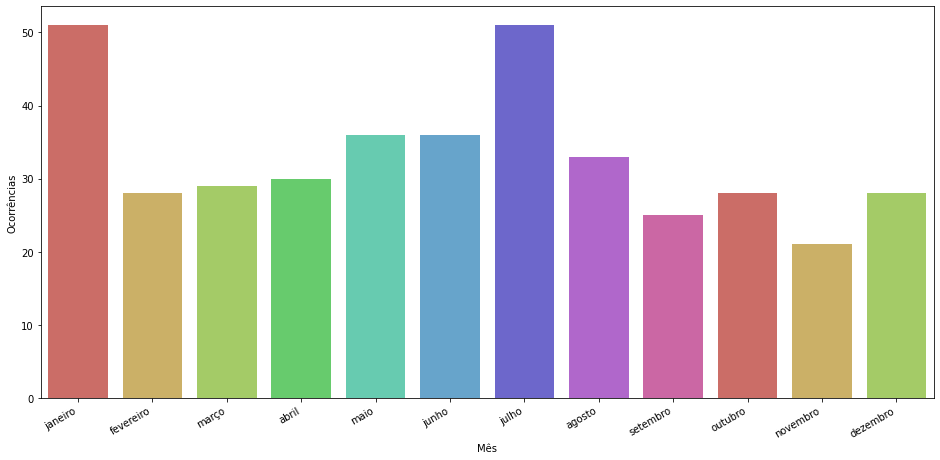

In [8]:
fig = plt.figure(figsize=(16,8))
sns.barplot(data=dfscrimes_anos[2018]["Homicídio doloso"][dfscrimes_anos[2018]["Homicídio doloso"]["UF"] == "Acre"],
        x="Mês",
        y="Ocorrências",
        palette=colors)
plt.gcf().autofmt_xdate()
plt.show()